# ReEDS Scenarios on PV ICE Tool

To explore different scenarios for furture installation projections of PV (or any technology), ReEDS output data can be useful in providing standard scenarios. ReEDS installation projections are used in this journal as input data to the PV ICE tool. 

Current sections include:

<ol>
    <li> ### Reading a standard ReEDS output file and saving it in a PV ICE input format </li>
<li>### Reading scenarios of interest and running PV ICE tool </li>
<li>###Plotting </li>
<li>### GeoPlotting.</li>
</ol>
    Notes:
   
Scenarios of Interest:
	the Ref.Mod, 
o	95-by-35.Adv, and 
o	95-by-35+Elec.Adv+DR ones


In [1]:
import PV_ICE
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent.parent / 'PV_ICE' / 'TEMP')

print ("Your simulation will be stored in %s" % testfolder)


Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


### Reading REEDS original file to get list of SCENARIOs, PCAs, and STATEs 

In [3]:
reedsFile = str(Path().resolve().parent.parent.parent.parent / 'December Core Scenarios ReEDS Outputs Solar Futures v3a.xlsx')
print ("Input file is stored in %s" % reedsFile)

rawdf = pd.read_excel(reedsFile,
                        sheet_name="new installs PV")
                        #index_col=[0,2,3]) #this casts scenario, PCA and State as levels
#now set year as an index in place
#rawdf.drop(columns=['State'], inplace=True)
rawdf.drop(columns=['Tech'], inplace=True)
rawdf.set_index(['Scenario','Year','PCA', 'State'], inplace=True)

Input file is stored in C:\Users\sayala\Documents\GitHub\December Core Scenarios ReEDS Outputs Solar Futures v3a.xlsx


In [4]:
scenarios = list(rawdf.index.get_level_values('Scenario').unique())
PCAs = list(rawdf.index.get_level_values('PCA').unique())
STATEs = list(rawdf.index.get_level_values('State').unique())

### Reading GIS inputs

In [5]:
GISfile = str(Path().resolve().parent.parent.parent.parent / 'gis_centroid_n.xlsx')
GIS = pd.read_excel(GISfile)
GIS = GIS.set_index('id')

In [6]:
GIS.head()

,long,lat,country
id,,,
p1,-121.452252,47.820991,USA
p10,-117.159039,35.120104,USA
p100,-78.257714,38.791108,USA
p101,-82.192477,28.708695,USA
p102,-80.563731,26.677092,USA


In [7]:
GIS.loc['p1'].long

-121.4522522

### Create Scenarios in PV_ICE

#### Rename difficult characters from Scenarios Names

In [8]:
simulationname = scenarios
simulationname = [w.replace('+', '_') for w in simulationname]
simulationname

['95-by-35.Adv',
 '95-by-35.Adv_DR',
 '95-by-35.Mod',
 '95-by-35_Elec.Adv',
 '95-by-35_Elec.Adv_DR',
 '95-by-35_Elec.Mod',
 'Reference.Adv',
 'Reference.Adv_DR',
 'Reference.Mod']

#### Downselect to Solar Future scenarios of interest

Scenarios of Interest:
<li> Ref.Mod
<li> 95-by-35.Adv  
<li> 95-by-35+Elec.Adv+DR 

In [9]:
SFscenarios = [simulationname[0], simulationname[4], simulationname[8]]
SFscenarios

['95-by-35.Adv', '95-by-35_Elec.Adv_DR', 'Reference.Mod']

#### Create the 3 Scenarios and assign Baselines

Keeping track of each scenario as its own PV ICE Object.

In [10]:
#for ii in range (0, 1): #len(scenarios):
i = 0
r1 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)

for jj in range (0, len(PCAs)): 
    filetitle = SFscenarios[i]+'_'+PCAs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'PCAs', filetitle)    
    r1.createScenario(name=PCAs[jj], file=filetitle)
    r1.scenario[PCAs[jj]].addMaterial('glass', file=r'..\baselines\ReedsSubset\baseline_material_glass_Reeds.csv')
    r1.scenario[PCAs[jj]].addMaterial('silicon', file=r'..\baselines\ReedsSubset\baseline_material_silicon_Reeds.csv')
    r1.scenario[PCAs[jj]].addMaterial('silver', file=r'..\baselines\ReedsSubset\baseline_material_silver_Reeds.csv')
    r1.scenario[PCAs[jj]].addMaterial('copper', file=r'..\baselines\ReedsSubset\baseline_material_copper_Reeds.csv')
    r1.scenario[PCAs[jj]].addMaterial('aluminum', file=r'..\baselines\ReedsSubset\baseline_material_aluminium_Reeds.csv')
    r1.scenario[PCAs[jj]].latitude = GIS.loc[PCAs[jj]].lat
    r1.scenario[PCAs[jj]].longitude = GIS.loc[PCAs[jj]].long

i = 1
r2 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)

for jj in range (0, len(PCAs)): 
    filetitle = SFscenarios[i]+'_'+PCAs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'PCAs', filetitle)        
    r2.createScenario(name=PCAs[jj], file=filetitle)
    r2.scenario[PCAs[jj]].addMaterial('glass', file=r'..\baselines\ReedsSubset\baseline_material_glass_Reeds.csv')
    r2.scenario[PCAs[jj]].addMaterial('silicon', file=r'..\baselines\ReedsSubset\baseline_material_silicon_Reeds.csv')
    r2.scenario[PCAs[jj]].addMaterial('silver', file=r'..\baselines\ReedsSubset\baseline_material_silver_Reeds.csv')
    r2.scenario[PCAs[jj]].addMaterial('copper', file=r'..\baselines\ReedsSubset\baseline_material_copper_Reeds.csv')
    r2.scenario[PCAs[jj]].addMaterial('aluminum', file=r'..\baselines\ReedsSubset\baseline_material_aluminium_Reeds.csv')
    r2.scenario[PCAs[jj]].latitude = GIS.loc[PCAs[jj]].lat
    r2.scenario[PCAs[jj]].longitude = GIS.loc[PCAs[jj]].long

i = 2
r3 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)
for jj in range (0, len(PCAs)): 
    filetitle = SFscenarios[i]+'_'+PCAs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'PCAs', filetitle)        
    r3.createScenario(name=PCAs[jj], file=filetitle)
    r3.scenario[PCAs[jj]].addMaterial('glass', file=r'..\baselines\ReedsSubset\baseline_material_glass_Reeds.csv')
    r3.scenario[PCAs[jj]].addMaterial('silicon', file=r'..\baselines\ReedsSubset\baseline_material_silicon_Reeds.csv')
    r3.scenario[PCAs[jj]].addMaterial('silver', file=r'..\baselines\ReedsSubset\baseline_material_silver_Reeds.csv')
    r3.scenario[PCAs[jj]].addMaterial('copper', file=r'..\baselines\ReedsSubset\baseline_material_copper_Reeds.csv')
    r3.scenario[PCAs[jj]].addMaterial('aluminum', file=r'..\baselines\ReedsSubset\baseline_material_aluminium_Reeds.csv')
    r3.scenario[PCAs[jj]].latitude = GIS.loc[PCAs[jj]].lat
    r3.scenario[PCAs[jj]].longitude = GIS.loc[PCAs[jj]].long


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP
path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP
path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [11]:
r1.scenario[PCAs[0]].data

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,mod_Repowering,mod_Repairing
0,2010,0.014450,14.700000,25.0,30.0,0.3,22.7,98.0,0.0,0.0,0.0,0.0
1,2011,4.384300,15.100000,25.0,30.0,0.3,23.0,98.0,0.0,0.0,0.0,0.0
2,2012,4.384300,15.400000,25.0,30.0,0.3,23.5,98.0,0.0,0.0,0.0,0.0
3,2013,6.074100,16.000000,28.0,33.0,0.3,24.2,98.0,0.0,0.0,0.0,0.0
4,2014,6.074100,16.300000,28.0,33.0,0.3,26.0,98.0,0.0,0.0,0.0,0.0
5,2015,15.515050,17.000000,28.0,33.0,0.3,28.7,98.0,0.0,0.0,0.0,0.0
6,2016,15.515050,17.500000,28.0,33.0,0.3,28.7,98.0,0.0,0.0,0.0,0.0
7,2017,16.540575,17.700000,28.0,33.0,0.3,29.5,98.0,0.0,0.0,0.0,0.0
8,2018,16.540575,18.400000,28.0,33.0,0.3,31.0,98.0,0.0,0.0,0.0,0.0
9,2019,30.872000,19.200000,28.0,33.0,0.3,32.4,98.0,0.0,0.0,0.0,0.0


# 2 FINISH: Set characteristics of Recycling to SF values.

In [12]:
#r1.scenario[]

#### Calculate Mass Flow

In [13]:
IRENA= False
PERFECTMFG = True

mats = ['glass', 'silicon','silver','copper','aluminum']

ELorRL = 'EL'
if IRENA:
    if ELorRL == 'RL':
        weibullInputParams = {'alpha': 5.3759, 'beta':30}  # Regular-loss scenario IRENA
    if ELorRL == 'EL':
        weibullInputParams = {'alpha': 2.49, 'beta':30}  # Regular-loss scenario IRENA
    
    if PERFECTMFG:
        for jj in range (0, len(r1.scenario.keys())):
            r1.scenario[STATEs[jj]].data['mod_lifetime'] = 40
            r1.scenario[STATEs[jj]].data['mod_MFG_eff'] = 100.0
            r2.scenario[STATEs[jj]].data['mod_lifetime'] = 40
            r2.scenario[STATEs[jj]].data['mod_MFG_eff'] = 100.0
            r3.scenario[STATEs[jj]].data['mod_lifetime'] = 40
            r3.scenario[STATEs[jj]].data['mod_MFG_eff'] = 100.0

            for kk in range(0, len(mats)):
                mat = mats[kk]
                r1.scenario[STATEs[jj]].material[mat].materialdata['mat_MFG_eff'] = 100.0    
                r2.scenario[STATEs[jj]].material[mat].materialdata['mat_MFG_eff'] = 100.0    
                r3.scenario[STATEs[jj]].material[mat].materialdata['mat_MFG_eff'] = 100.0    
    
    r1.calculateMassFlow(weibullInputParams=weibullInputParams)
    r2.calculateMassFlow(weibullInputParams=weibullInputParams)
    r3.calculateMassFlow(weibullInputParams=weibullInputParams)
    title_Method = 'Irena_'+ELorRL
else:
    r1.calculateMassFlow()
    r2.calculateMassFlow()
    r3.calculateMassFlow()
    title_Method = 'PVICE'


Working on Scenario:  p1
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p10
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p101
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Ma

Working on Scenario:  p127
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p128
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p129
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p13
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on 

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p35
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p36
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p37
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  alum

==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p63
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p64
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p65
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p66
********************
Finished Area+Power Gener

==> Working on Material :  aluminum
Working on Scenario:  p91
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p92
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p93
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p94
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on M

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p12
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p120
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p121
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  al

==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p27
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p28
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p29
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p3
********************
Finished Area+Power Genera

==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p55
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p56
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p57
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p58
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Ma

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p84
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p85
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p86
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  alum

==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p111
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p112
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p113
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p114
********************
Finished Area+Power Generation Calculations
==> Working 

==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p19
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p2
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p20
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p21
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Mat

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p48
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p49
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p5
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  alumi

==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p76
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p77
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p78
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  p79
********************
Finished Area+Power Generation Calculations
==> Working on M

In [14]:
print("PCAs:", r1.scenario.keys())
print("Module Keys:", r1.scenario[PCAs[jj]].data.keys())
print("Material Keys: ", r1.scenario[PCAs[jj]].material['glass'].materialdata.keys())

PCAs: dict_keys(['p1', 'p10', 'p100', 'p101', 'p102', 'p103', 'p104', 'p105', 'p106', 'p107', 'p108', 'p109', 'p11', 'p110', 'p111', 'p112', 'p113', 'p114', 'p115', 'p116', 'p117', 'p118', 'p119', 'p12', 'p120', 'p121', 'p122', 'p123', 'p124', 'p125', 'p126', 'p127', 'p128', 'p129', 'p13', 'p130', 'p131', 'p132', 'p133', 'p134', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p2', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p3', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p4', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p5', 'p50', 'p51', 'p52', 'p53', 'p54', 'p55', 'p56', 'p57', 'p58', 'p59', 'p6', 'p60', 'p61', 'p62', 'p63', 'p64', 'p65', 'p66', 'p67', 'p68', 'p69', 'p7', 'p70', 'p71', 'p72', 'p73', 'p74', 'p75', 'p76', 'p77', 'p78', 'p79', 'p8', 'p80', 'p81', 'p82', 'p83', 'p84', 'p85', 'p86', 'p87', 'p88', 'p89', 'p9', 'p90', 'p91', 'p92', 'p93', 'p94', 'p95', 'p96', 'p97', 'p98', 'p99'])
Module Keys: Index

In [15]:
"""
r1.plotScenariosComparison(keyword='Cumulative_Area_disposedby_Failure')
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')
r1.scenario['p1'].data.head(21)
r2.scenario['p1'].data.head(21)
r3.scenario['p1'].data.head(21)
"""
pass

# SAVE DATA FOR BILLY: PCAs

### PCA vs. Cumulative Waste by 2050


In [16]:
#for 3 significant numbers rounding
N = 2

SFScenarios[kk].scenario[PCAs[zz]].data.year

Index 20 --> 2030

Index 30 --> 2040

Index 40 --> 2050

In [18]:
idx2030 = 20
idx2040 = 30
idx2050 = 40
print("index ", idx2030, " is year ", r1.scenario[PCAs[0]].data['year'].iloc[idx2030])
print("index ", idx2040, " is year ", r1.scenario[PCAs[0]].data['year'].iloc[idx2040])
print("index ", idx2050, " is year ", r1.scenario[PCAs[0]].data['year'].iloc[idx2050])

index  20  is year  2030
index  30  is year  2040
index  40  is year  2050


#### 1 - PCA Cumulative Virgin Needs by 2050

In [19]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = []
    for ii in range (0, len(materials)):    
        
        keywordsum = []
        for zz in range (0, len(PCAs)):
            keywordsum.append(SFScenarios[kk].scenario[PCAs[zz]].material[materials[ii]].materialdata[keyword].sum())
    
        materiallist.append(keywordsum)
    df = pd.DataFrame (materiallist,columns=PCAs, index = materials)
    df = df.T
    df = df.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , df], axis=1)

scenariolist = scenariolist/1000000 # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 1 - PCA Cumulative2050 VirginMaterialNeeds_tons.csv')

#### 2 - PCA Cumulative EoL Only Waste by 2050

In [20]:
keyword='mat_Total_EOL_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = []
    for ii in range (0, len(materials)):    
        
        keywordsum = []
        for zz in range (0, len(PCAs)):
            keywordsum.append(SFScenarios[kk].scenario[PCAs[zz]].material[materials[ii]].materialdata[keyword].sum())
    
        materiallist.append(keywordsum)
    df = pd.DataFrame (materiallist,columns=PCAs, index = materials)
    df = df.T
    df = df.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , df], axis=1)

scenariolist = scenariolist/1000000 # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 2 - PCA Cumulative2050 Waste EOL_tons.csv')

#### 3 - PCA Yearly Virgin Needs 2030 2040 2050

In [21]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(PCAs)):
            keywordsum2030.append(SFScenarios[kk].scenario[PCAs[zz]].material[materials[ii]].materialdata[keyword][idx2030])
            keywordsum2040.append(SFScenarios[kk].scenario[PCAs[zz]].material[materials[ii]].materialdata[keyword][idx2040])
            keywordsum2050.append(SFScenarios[kk].scenario[PCAs[zz]].material[materials[ii]].materialdata[keyword][idx2050])
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=PCAs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tons
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 3 - PCA Yearly 2030 2040 2050 VirginMaterialNeeds_tons.csv')

#### 4 - PCA Yearly EoL Waste 2030 2040 2050

In [22]:
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(PCAs)):
            keywordsum2030.append(SFScenarios[kk].scenario[PCAs[zz]].material[materials[ii]].materialdata[keyword][idx2030])
            keywordsum2040.append(SFScenarios[kk].scenario[PCAs[zz]].material[materials[ii]].materialdata[keyword][idx2040])
            keywordsum2050.append(SFScenarios[kk].scenario[PCAs[zz]].material[materials[ii]].materialdata[keyword][idx2050])
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=PCAs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/1000000   # Converting to Metric Tonnes
#scenariolist = scenariolist.applymap(lambda x: round(x, N - int(np.floor(np.log10(abs(x))))))
#scenariolist = scenariolist.applymap(lambda x: int(x))
scenariolist.to_csv(title_Method+' 4 - PCA Yearly 2030 2040 2050 Waste_EOL_tons.csv')

# GEOPANDAS

In [23]:
latitude_all =[]
longitude_all = []
cumulativewaste2050 = []
for scen in r1.scenario.keys():
    latitude_all.append(r1.scenario[scen].latitude)
    longitude_all.append(r1.scenario[scen].longitude)
    cumulativewaste2050.append(r1.scenario[scen].material['glass'].materialdata['mat_Total_Landfilled'].sum())

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

#street_map = gpd.read_file(r'C:\Users\sayala\Desktop\geopandas\cb_2018_us_nation_20m\cb_2018_us_nation_20m.shp')

# Show the map only
#fig, ax = plt.subplots(figsize=(10,15))
#street_map.plot(ax=ax)

In [26]:
frame = { 'Latitude': latitude_all, 'Longitude': longitude_all, 'CumulativeWaste2050': cumulativewaste2050}   
df = pd.DataFrame(frame) 

In [27]:
df.head()

,Latitude,Longitude,CumulativeWaste2050
0,47.820991,-121.452252,1.086193e+10
1,35.120104,-117.159039,8.845732e+11
2,38.791108,-78.257714,7.054238e+09
3,28.708695,-82.192477,2.878110e+11
4,26.677092,-80.563731,1.938473e+11


In [28]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geometry[:3]

In [29]:
crs = {'init':'epsg:4326'}

In [30]:
geo_df = gpd.GeoDataFrame(df, # specify our data
                         crs = crs, # specify our coordinate reference system
                         geometry = geometry) # specify the geometry list we created
geo_df.head()

,Latitude,Longitude,CumulativeWaste2050,geometry
0,47.820991,-121.452252,1.086193e+10,POINT (-121.45225 47.82099)
1,35.120104,-117.159039,8.845732e+11,POINT (-117.15904 35.12010)
2,38.791108,-78.257714,7.054238e+09,POINT (-78.25771 38.79111)
3,28.708695,-82.192477,2.878110e+11,POINT (-82.19248 28.70870)
4,26.677092,-80.563731,1.938473e+11,POINT (-80.56373 26.67709)


NameError: name 'street_map' is not defined

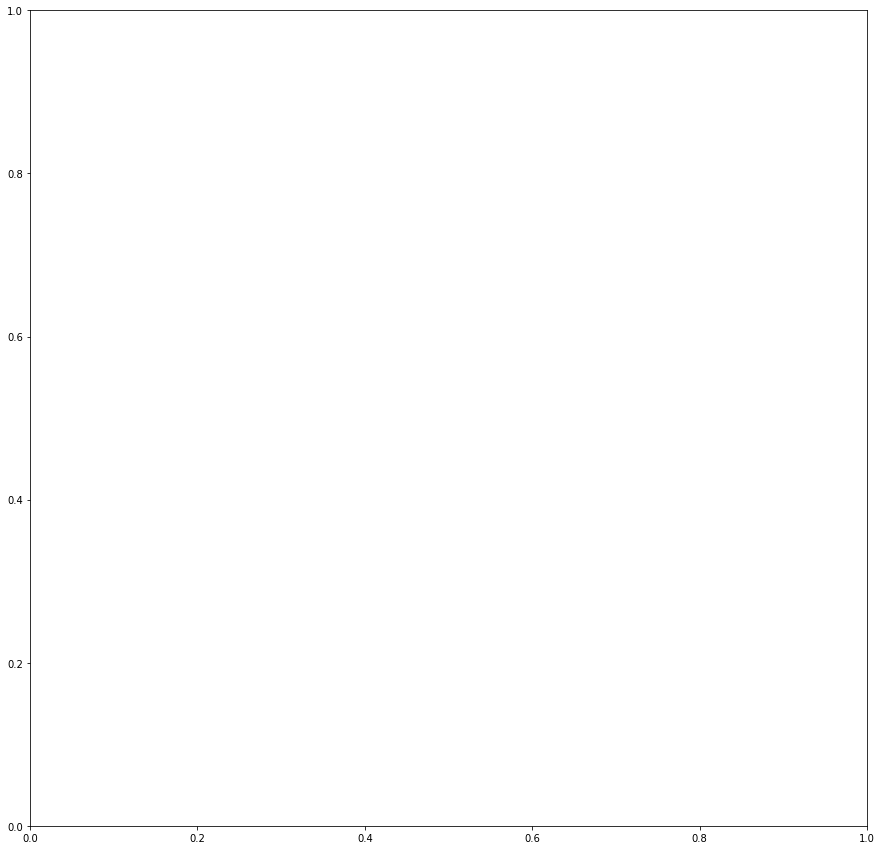

In [31]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = "grey")
geo_df[geo_df['CumulativeWaste2050'] >= 1.918125e+09].plot(ax=ax, markersize = 20, color= "blue", marker = "o", label = "Bigger Than")
geo_df[geo_df['CumulativeWaste2050'] < 1.918125e+09].plot(ax=ax, markersize = 20, color= "red", marker = "o", label = "Less Than")
plt.xlim([-130, -60])
plt.ylim([20, 50])
plt.legend(prop={'size':15})

NameError: name 'street_map' is not defined

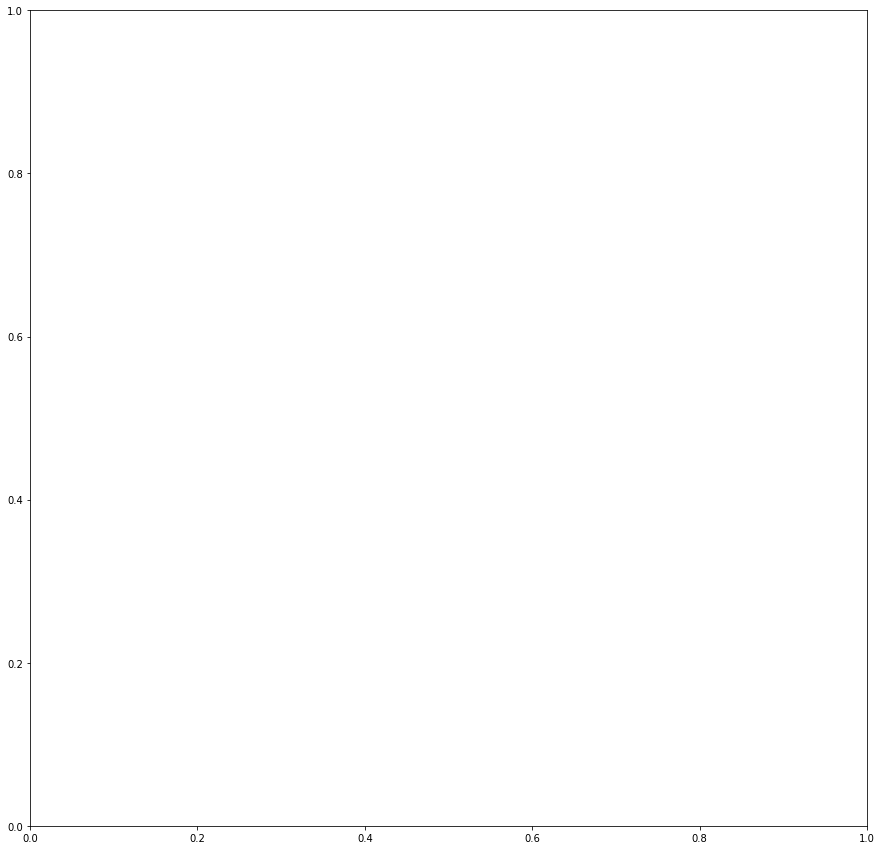

In [32]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

latitude = random.sample(range(25, 45), 10) 
longitude = random.sample(range(-125, -65), 10) 
weight = random.sample(range(0, 500), 10) 

frame = { 'Latitude': latitude, 'Longitude': longitude, 'Weight': weight}   
df = pd.DataFrame(frame) 

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, # specify our data
                         crs = crs, # specify our coordinate reference system
                         geometry = geometry) # specify the geometry list we created

fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = "grey")
geo_df[geo_df['Weight'] >=250].plot(ax=ax, markersize = 20, color= "blue", marker = "o", label = "Bigger Than")
geo_df[geo_df['Weight'] < 250].plot(ax=ax, markersize = 20, color= "red", marker = "o", label = "Less Than")
plt.xlim([-130, -60])
plt.ylim([20, 50])
plt.legend(prop={'size':15})

# OBSOLETE BECAUSE FASTER TO DO ON NATION LEVEL

## Aggregating PCAs Material Landfilled to obtain US totals by Year

In [ ]:
### Singe Material Example Aggregating PCAs to obtain US Total

"""
keyword='mat_Total_Landfilled'
#keyword='new_Installed_Capacity_[MW]'

plt.figure()
plt.plot(r1.scenario[PCAs[0]].data['year'], foo, label=PCAs[12])
plt.title(keyword)
plt.legend()

for jj in range (1, len(PCAs)): 
    foo['silver'] += r1.scenario[PCAs[jj]].material['silver'].materialdata[keyword]


fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.plot(r1.scenario[PCAs[0]].data['year'], foo['silver'], label='US')
plt.title("Material Landfilled per Year US")
#ax.set_yscale('log')
print(max(foo))
"""
pass

In [ ]:
### Verbose Material Example Aggregating PCAs to obtain US Total

"""
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

USyearlyWASTE=pd.DataFrame()

# Loop over Materials
for ii in range (0, len(materials)):    
    material = materials[ii]
    foo1 = r1.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
    foo1 = foo1.to_frame(name=material)
    foo2 = r2.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
    foo2 = foo2.to_frame(name=material)
    foo3 = r3.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
    foo3 = foo3.to_frame(name=material)

    USyearlyWASTE[r1.name + '_' + material] = foo1[material]
    USyearlyWASTE[r2.name + '_' + material] = foo2[material]
    USyearlyWASTE[r3.name + '_' + material] = foo3[material]

    # Loop over PCAs
    for jj in range (1, len(PCAs)): 
        USyearlyWASTE[r1.name + '_' + material] += r1.scenario[PCAs[jj]].material[material].materialdata[keyword]
        USyearlyWASTE[r2.name + '_' + material] += r2.scenario[PCAs[jj]].material[material].materialdata[keyword]
        USyearlyWASTE[r3.name + '_' + material] += r3.scenario[PCAs[jj]].material[material].materialdata[keyword]

# Converting to grams to Tons. 
USyearlyWASTE = USyearlyWASTE/907185
USyearlyWASTE.head(20)
"""
pass

In [ ]:
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

USyearly=pd.DataFrame()

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    for ii in range (0, len(materials)):    
        material = materials[ii]
        foo = obj.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["Waste_"+material+'_'+obj.name] = foo[material]

        # Loop over PCAs
        for jj in range (1, len(PCAs)): 
            USyearly["Waste_"+material+'_'+obj.name] += obj.scenario[PCAs[jj]].material[material].materialdata[keyword]

# Converting to grams to Tons. 
#USyearly = USyearly/907185
USyearly.head(20)

In [ ]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    for ii in range (0, len(materials)):    
        material = materials[ii]
        foo = obj.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["VirginStock_"+material+'_'+obj.name] = foo[material]

        # Loop over PCAs
        for jj in range (1, len(PCAs)): 
            USyearly["VirginStock_"+material+'_'+obj.name] += obj.scenario[PCAs[jj]].material[material].materialdata[keyword]



### Converting to grams to Tons. 


In [ ]:
USyearly = USyearly/1000000  # This is the ratio for Metric tonnes
#907185 -- this is for US tons

### Adding Installed Capacity to US

In [ ]:
keyword='Installed_Capacity_[W]'

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    foo = obj.scenario[PCAs[0]].data[keyword]
    foo = foo.to_frame(name=keyword)
    USyearly["Capacity_"+obj.name] = foo[keyword]

    # Loop over PCAs
    for jj in range (1, len(PCAs)): 
        USyearly["Capacity_"+obj.name] += obj.scenario[PCAs[jj]].data[keyword]

USyearly.head(20)

In [ ]:
keywords=['VirginStock_', 'Waste_', 'Capacity']
SFScenarios = [r1, r2, r3]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        obj = SFScenarios[kk]
        plt.figure()
        plt.plot([],[],color='m', label='glass', linewidth=5)
        plt.plot([],[],color='c', label='silicon', linewidth=5)
        plt.plot([],[],color='r', label='silver', linewidth=5)
        plt.plot([],[],color='k', label='copper', linewidth=5)
        plt.plot([],[],color='g', label='aluminum', linewidth=5)

        plt.stackplot(obj.scenario[PCAs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                          USyearly[keyw+materials[1]+'_'+obj.name], 
                                                          USyearly[keyw+materials[2]+'_'+obj.name], 
                                                          USyearly[keyw+materials[3]+'_'+obj.name], 
                                                          USyearly[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['m','c','r','k', 'g'])
        plt.ylabel('Mass [Tons]')
        plt.xlim([2010, 2050])
        plt.title('Yearly '+keyw+ ' ' + obj.name)
        plt.legend(materials)


In [ ]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_', 'Capacity_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[PCAs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                          USyearly[keyw+materials[1]+'_'+obj.name], 
                                                          USyearly[keyw+materials[2]+'_'+obj.name], 
                                                          USyearly[keyw+materials[3]+'_'+obj.name], 
                                                          USyearly[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 
       
for i in range (0, 3):
    axs[i].set_ylim([0, 4e7])
    axs[i+3].set_ylim([0, 4e7])

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[5].legend(materials)
        

In [ ]:
USyearly.keys()

In [ ]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_', 'Capacity_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(3,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[PCAs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                          USyearly[keyw+materials[1]+'_'+obj.name], 
                                                          USyearly[keyw+materials[2]+'_'+obj.name], 
                                                          USyearly[keyw+materials[3]+'_'+obj.name], 
                                                          USyearly[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 

        
# CAPACITY IS BY MODULE NOT MATERIAL:
ii = 2
keyw = keywords[ii]

# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
    #axs[i].plot([],[],color='c', label='glass', linewidth=5)
    axs[i].plot(obj.scenario[PCAs[0]].data['year'], USyearly[keyw+obj.name])
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2010, 2050])
    axs[i].set_title(keyw+ ' ' + obj.name)
    #axs[i].legend(materials)
    i += 1 




for i in range (0, 3):
    axs[i].set_ylim([0, 4e7])
    axs[i+3].set_ylim([0, 4e7])

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[5].legend(materials)
        

In [ ]:
UScum = USyearly.copy()
UScum = UScum.cumsum()
UScum.head()

In [ ]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_', 'Capacity_']
SFScenarios = [r1, r2, r3]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

    
fig, axs = plt.subplots(3,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[PCAs[0]].data['year'], UScum[keyw+materials[0]+'_'+obj.name], 
                                                          UScum[keyw+materials[1]+'_'+obj.name], 
                                                          UScum[keyw+materials[2]+'_'+obj.name], 
                                                          UScum[keyw+materials[3]+'_'+obj.name], 
                                                          UScum[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 

# CAPACITY IS BY MODULE NOT MATERIAL:
ii = 2
keyw = keywords[ii]

# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
    #axs[i].plot([],[],color='c', label='glass', linewidth=5)
    axs[i].plot(obj.scenario[PCAs[0]].data['year'], USyearly[keyw+obj.name]/1e6)
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2010, 2050])
    axs[i].set_title(keyw+ ' ' + obj.name)
    #axs[i].legend(materials)
    i += 1 
    
for i in range (0, 3):
    axs[i].set_ylim([1e0, 10e8])
    axs[i+3].set_ylim([1e0, 10e8])
    axs[i+6].set_ylim([1e0, 10e7])

    axs[i].set_yscale('log')
    axs[i+3].set_yscale('log')
    axs[i+6].set_yscale('log')
    
    
axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[6].set_ylabel('Installed Capacity [TW]')
axs[5].legend(materials)
